In [1]:
# pip install --upgrade mplfinance
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

df = pd.read_csv('./stock_data/daily/000001_daily.csv', index_col='日期', parse_dates=True,na_values=['nan', 'Nan','NaN', 'NaT', '', ''])
df['time'] = date2num(df.index.to_pydatetime())
df = df[["开盘","收盘","最高","最低"]]
df

,开盘,收盘,最高,最低
日期,,,,
1991-04-03,49.00,49.00,49.00,49.00
1991-04-04,48.76,48.76,48.76,48.76
1991-04-05,48.52,48.52,48.52,48.52
1991-04-06,48.28,48.28,48.28,48.28
1991-04-08,48.04,48.04,48.04,48.04
...,...,...,...,...
2022-05-09,14.94,14.55,14.94,14.46
2022-05-10,14.50,14.59,14.60,14.11
2022-05-11,14.54,14.63,14.84,14.44


In [26]:
# 上涨（涨停）
df[(df['收盘']-df['开盘'])/df['开盘']>=0.1]

,开盘,收盘,最高,最低
日期,,,,
1991-10-08,18.70,21.40,21.40,18.60
1991-10-09,21.50,25.95,26.25,21.50
1991-10-11,21.80,24.00,24.00,17.95
1991-11-12,32.50,35.85,35.90,32.50
1991-11-19,29.40,32.50,32.50,29.00
1992-04-13,29.75,32.95,33.80,29.75
1992-06-17,33.45,36.90,37.15,32.30
1994-04-29,14.30,15.99,16.00,14.00
1994-08-03,9.70,10.80,10.85,9.70


In [27]:
# 下跌（跌停）
df[(df['开盘']-df['收盘'].shift(1))/df['收盘'].shift(1)<=-0.1]

,开盘,收盘,最高,最低
日期,,,,
1991-08-17,15.00,15.80,15.80,14.75
1992-03-23,21.50,21.90,22.05,21.50
1993-05-24,28.60,27.00,28.65,26.80
1994-07-11,8.70,8.55,8.75,8.40
1995-05-23,11.00,10.15,11.49,10.05
1995-09-25,8.00,7.94,8.03,7.85
1996-05-27,9.49,9.26,9.66,9.20
1996-12-16,16.86,16.86,16.86,16.86
1996-12-17,15.17,15.17,16.79,15.17


In [28]:
# 计算macd
df['ma5'] = df['开盘'].rolling(5).mean()
df['ma30'] = df['开盘'].rolling(30).mean()
df

,开盘,收盘,最高,最低,ma5,ma30
日期,,,,,,
1991-04-03,49.00,49.00,49.00,49.00,NaN,NaN
1991-04-04,48.76,48.76,48.76,48.76,NaN,NaN
1991-04-05,48.52,48.52,48.52,48.52,NaN,NaN
1991-04-06,48.28,48.28,48.28,48.28,NaN,NaN
1991-04-08,48.04,48.04,48.04,48.04,48.520,NaN
...,...,...,...,...,...,...
2022-05-09,14.94,14.55,14.94,14.46,15.284,15.482333
2022-05-10,14.50,14.59,14.60,14.11,15.070,15.479333
2022-05-11,14.54,14.63,14.84,14.44,14.840,15.460333


In [29]:
# 选取数据范围
df = df['2010-01-04': ]
# 倒叙排列
df = df[::-1]
# 取1000个数据
df = df[:1000]
df

,开盘,收盘,最高,最低,ma5,ma30
日期,,,,,,
2022-05-13,14.50,14.61,14.66,14.49,14.592,15.424000
2022-05-12,14.48,14.38,14.56,14.33,14.696,15.445667
2022-05-11,14.54,14.63,14.84,14.44,14.840,15.460333
2022-05-10,14.50,14.59,14.60,14.11,15.070,15.479333
2022-05-09,14.94,14.55,14.94,14.46,15.284,15.482333
...,...,...,...,...,...,...
2018-04-04,10.68,10.87,11.01,10.60,10.822,11.726667
2018-04-03,10.60,10.56,10.67,10.51,10.856,11.769333
2018-04-02,10.87,10.71,10.99,10.70,10.956,11.811667


/Users/henrydu/miniforge3/envs/learn_stock/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/henrydu/miniforge3/envs/learn_stock/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/henrydu/miniforge3/envs/learn_stock/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/henrydu/miniforge3/envs/learn_stock/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30424 (\N{CJK UNIFIED IDEOGRAPH-76D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


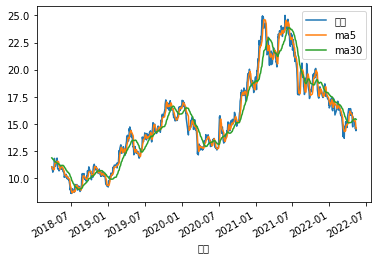

In [30]:
# 画图
df[['收盘', 'ma5', 'ma30']].plot()
plt.show()

In [31]:
# 计算金叉死叉
sr1 = df['ma5'] < df['ma30']
sr2 = df['ma5'] >= df['ma30']
death_cross = df[sr1 & sr2.shift(1)].index
golden_cross = df[~(sr1 | sr2.shift(1))].index

In [32]:
# 死叉
death_cross

DatetimeIndex(['2022-04-01', '2022-02-14', '2021-12-08', '2021-10-12',
               '2021-09-10', '2021-08-16', '2021-04-21', '2021-04-02',
               '2021-01-07', '2020-08-14', '2020-07-03', '2020-06-04',
               '2020-04-22', '2019-12-17', '2019-09-20', '2019-09-04',
               '2019-08-09', '2019-06-14', '2019-03-29', '2019-01-14',
               '2018-10-17', '2018-08-23', '2018-07-25', '2018-04-23',
               '2018-04-17'],
              dtype='datetime64[ns]', name='日期', freq=None)

In [33]:
# 金叉
golden_cross

DatetimeIndex(['2022-04-27', '2022-02-15', '2021-12-16', '2021-11-03',
               '2021-09-17', '2021-08-26', '2021-06-16', '2021-04-12',
               '2021-02-25', '2020-12-18', '2020-07-28', '2020-06-12',
               '2020-05-25', '2020-01-21', '2019-11-13', '2019-09-17',
               '2019-08-30', '2019-08-05', '2019-05-07', '2019-03-28',
               '2018-11-12', '2018-10-16', '2018-08-16', '2018-05-03',
               '2018-04-18'],
              dtype='datetime64[ns]', name='日期', freq=None)

In [34]:
sr1 = pd.Series(1, index=golden_cross)
sr2 = pd.Series(0, index=death_cross)
sr = sr1.append(sr2).sort_index()
sr

/var/folders/hr/ppfykdg56ks4mjvczmbjkv1w0000gn/T/ipykernel_94976/2417704143.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr = sr1.append(sr2).sort_index()


日期
2018-04-17    0
2018-04-18    1
2018-04-23    0
2018-05-03    1
2018-07-25    0
2018-08-16    1
2018-08-23    0
2018-10-16    1
2018-10-17    0
2018-11-12    1
2019-01-14    0
2019-03-28    1
2019-03-29    0
2019-05-07    1
2019-06-14    0
2019-08-05    1
2019-08-09    0
2019-08-30    1
2019-09-04    0
2019-09-17    1
2019-09-20    0
2019-11-13    1
2019-12-17    0
2020-01-21    1
2020-04-22    0
2020-05-25    1
2020-06-04    0
2020-06-12    1
2020-07-03    0
2020-07-28    1
2020-08-14    0
2020-12-18    1
2021-01-07    0
2021-02-25    1
2021-04-02    0
2021-04-12    1
2021-04-21    0
2021-06-16    1
2021-08-16    0
2021-08-26    1
2021-09-10    0
2021-09-17    1
2021-10-12    0
2021-11-03    1
2021-12-08    0
2021-12-16    1
2022-02-14    0
2022-02-15    1
2022-04-01    0
2022-04-27    1
dtype: int64

In [36]:
# 回测
first_money = 100000
hold = 0
money = first_money
for i in range(0, len(sr)):
    p = df['开盘'][sr.index[i]]
    if sr.iloc[i] == 1:
        # 金叉
        buy = (money // (100 * p))
        hold += buy * 100
        money -= buy * 100 * p
    else:
        money += hold * p
        hold = 0

p = df['开盘'][-1]
now_money = hold * p + money
print(now_money - first_money)

-43768.000000000015
